<a href="https://colab.research.google.com/github/akshats13/Irismodel/blob/main/irispredictmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
2+2

4

In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [82]:
!pip list


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [83]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [84]:
# reshape and view
my_torch = my_torch.reshape(-1,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [85]:
#slice
my_torch1 = torch.arange(10)
my_torch1


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [86]:
my_torch1[5]

tensor(5)

In [87]:
tensora = torch.tensor([1,2,3,4])
tensorb = torch.tensor([5,6,7,8])
tensora + tensorb

tensor([ 6,  8, 10, 12])

In [88]:
torch.add(tensora,tensorb)

tensor([ 6,  8, 10, 12])

In [89]:
torch.sub(tensorb,tensora)

tensor([4, 4, 4, 4])

In [90]:
tensorc = tensora.reshape(2,2)
tensorc

tensor([[1, 2],
        [3, 4]])

In [91]:
tensora.add_(tensorb)

tensor([ 6,  8, 10, 12])

In [92]:
tensora

tensor([ 6,  8, 10, 12])

In [93]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)

    return x



In [94]:
torch.manual_seed(41)
model=Model()

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df = pd.read_csv(url)


In [97]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [98]:
my_df['species'] = my_df['species'].replace('setosa', 0)
my_df['species'] = my_df['species'].replace('versicolor', 1)
my_df['species'] = my_df['species'].replace('virginica', 2)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [99]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [100]:
# train ,test and split
X = my_df.drop('species', axis=1)
y = my_df['species']
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: species, Length: 150, dtype: int64)

In [101]:
#convert to numpy arrays
X=X.values
y=y.values


In [102]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [103]:
from sklearn.model_selection import train_test_split


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [105]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [106]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [107]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [108]:
y_train

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])

In [109]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [110]:
epochs = 200
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train) # calculating the loss
  losses.append(loss.detach().numpy()) # keeping track of losses

  if i % 10 == 0:
    print(f"Epoch {i} and loss: {loss}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss: 1.1251550912857056
Epoch 10 and loss: 1.0096259117126465
Epoch 20 and loss: 0.8157405853271484
Epoch 30 and loss: 0.585706353187561
Epoch 40 and loss: 0.3999636471271515
Epoch 50 and loss: 0.2676880657672882
Epoch 60 and loss: 0.17942363023757935
Epoch 70 and loss: 0.12151690572500229
Epoch 80 and loss: 0.0860118418931961
Epoch 90 and loss: 0.06520850956439972
Epoch 100 and loss: 0.05286576971411705
Epoch 110 and loss: 0.04508377984166145
Epoch 120 and loss: 0.03979950025677681
Epoch 130 and loss: 0.035970721393823624
Epoch 140 and loss: 0.03293721750378609
Epoch 150 and loss: 0.030419377610087395
Epoch 160 and loss: 0.026795225217938423
Epoch 170 and loss: 0.023382490500807762
Epoch 180 and loss: 0.02053171582520008
Epoch 190 and loss: 0.018496563658118248


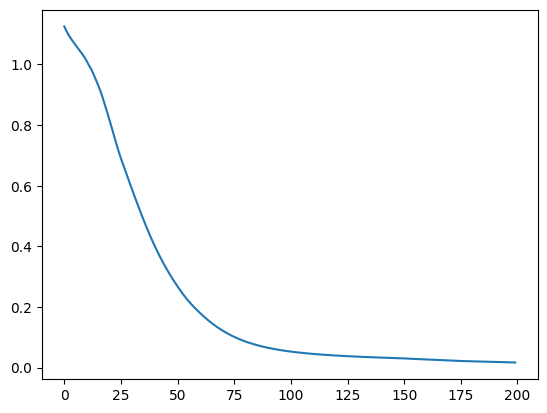

In [111]:
plt.plot(range(epochs), losses)

In [112]:
# evaluating the model
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)



In [113]:
loss

tensor(0.1816)

In [116]:
correct= 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f"We got {correct} correct!")

1.) tensor([-7.1094,  3.8939,  9.0023]) 	 2
2.) tensor([-9.7571,  1.8032, 15.7623]) 	 2
3.) tensor([-10.9679,   2.8771,  16.6049]) 	 2
4.) tensor([-3.7651,  8.0382, -1.2670]) 	 1
5.) tensor([-9.0336,  3.5231, 12.6397]) 	 2
6.) tensor([-1.8252,  8.6930, -5.3406]) 	 1
7.) tensor([-6.8739,  4.9814,  7.3719]) 	 2
8.) tensor([-3.6496,  8.2250, -1.6720]) 	 1
9.) tensor([-7.9286,  4.2582,  9.9591]) 	 2
10.) tensor([-10.4300,   1.8736,  16.8136]) 	 2
11.) tensor([-6.4731,  5.1587,  6.5103]) 	 2
12.) tensor([ 12.4402,   2.4554, -21.9006]) 	 0
13.) tensor([ 11.4201,   2.2030, -19.9097]) 	 0
14.) tensor([-0.1948,  6.9621, -6.0906]) 	 1
15.) tensor([ 10.1552,   3.3046, -19.1049]) 	 0
16.) tensor([-5.9773,  5.7982,  4.9693]) 	 2
17.) tensor([ 11.2076,   2.5239, -19.9613]) 	 0
18.) tensor([-6.8903,  4.2918,  8.1963]) 	 1
19.) tensor([ 12.0349,   2.3649, -21.1218]) 	 0
20.) tensor([  9.6796,   2.7806, -17.7303]) 	 0
21.) tensor([-0.8234,  7.6353, -5.8071]) 	 1
22.) tensor([-10.0607,   2.6571,  15.337

In [117]:
# saving the model
torch.save(model.state_dict(), "my_iris_model.pt")

In [118]:
new_model = Model()
new_model.load_state_dict(torch.load("my_iris_model.pt"))

<All keys matched successfully>

In [119]:
new_model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)